# Overview

* the goal of this notebook is to download and display WISE images for APPSS galaxies
* we will use the WISE images to estimate the stellar mass of galaxiesy
* there are two samples of galaxies: APPSS sample, and the supernova host galaxy sample



In [1]:
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits
from PIL import Image


In [2]:
homedir = os.getenv("HOME")
sys.path.append(homedir+"/github/APPSS/python/")

In [3]:
from image_functions import *

In [4]:
UNWISE_PIXSCALE = 2.75
LEGACY_PIXSCALE = 1


# Set the working directory to something other than github directory

In [ ]:
cwd = homedir+"/research/APPSS/mstar/"
os.chdir(cwd)

# Read in catalog of galaxies

In [ ]:
# APPSS catalogs from Catie

appscat_filename = homedir+"/research/APPSS/sample/appss123.catalog.211115.csv"
apps = Table.read(appscat_filename)

In [ ]:
apps

In [ ]:
# APPSS catalogs from Catie

appscat_filename = homedir+"/research/APPSS/GBT22A-sample/gbt22a_430_sample_legacy.fits"
gbt = Table.read(appscat_filename)

In [ ]:
gbt

In [ ]:
# select first galaxy in the list as a test
ra = gbt['RA'][4]
dec = gbt['DEC'][4]
galname = f"AGC{gbt['name'][4]:06d}"
print(galname)

# Select a test galaxy

In [ ]:
# select first galaxy in the list as a test
ra = apps['OCra'][4]
dec = apps['OCdec'][4]
galname = 'AGC'+str(apps['agcnum'][4])


In [ ]:
!ls
# run this to start over
! rm AGC11834*
!ls

# Display legacy and unwise with new function

In [ ]:
%run ~/github/APPSS/python/image_functions.py

In [ ]:
display_legacy_unwise(ra,dec,galname,imsize_arcsec=120)
plt.show()

# Display first 20 galaxies

In [ ]:
%run ~/github/APPSS/python/image_functions.py

In [ ]:
plotdir = cwd+"/plots/"
i = 0
#while i < 10:
for i in range(20):
    
    ra = apps['OCra'][i]
    dec = apps['OCdec'][i]
    galname = 'AGC'+str(apps['agcnum'][i])
    
    display_legacy_unwise(ra,dec,galname,imsize_arcsec=60,plotdir=plotdir)

    

# Code to download a WISE image

In [ ]:
# set image size
imsize_arcsec = 120 # length/width of image in arcseconds
imsize_pixels_legacy = round(imsize_arcsec/LEGACY_PIXSCALE)
imsize_pixels_unwise = round(imsize_arcsec/UNWISE_PIXSCALE)

In [ ]:

t = get_unwise_image(ra,dec,galid=galname,makeplots=False,imsize=str(imsize_pixels_unwise))
imagefiles = t[0]
noisefiles = t[1]
imagefiles.sort()
noisefiles.sort()

# Code to download legacy images

In [ ]:
bands = ['g','r','z']
legimfiles = []

for i,b in enumerate(bands):
    if i == 0:
        # only need to download this once
        getjpg = True
    else:
        getjpg = False
    t = get_legacy_images(ra,dec,galid=galname,band=b,makeplots=False,imsize=str(imsize_pixels_legacy))
    if i == 0:
        legimfiles.append(t[0])
        legjpgfile = t[1]
    else:
        legimfiles.append(t[0])
print(legimfiles)
print(legjpgfile)

# Plot cutouts

In [ ]:
# make a plot
plt.figure(figsize=(12,6.5))

# concatinate lists
legacy_images = [legjpgfile]+legimfiles
imnames = ['grz','g','r','z']
# plot legacy images in top row
for i,im in enumerate(legacy_images):
    plt.subplot(2,4,i+1)
    if i == 0:
        # display jpg
        t = Image.open(im)
        plt.imshow(t,origin='upper')
    else:
        data = fits.getdata(im)
        display_image(data,lowrange=False,percent=95)
    plt.title(imnames[i],fontsize=14)

# plot WISE images
imnames = ['W1','W2','W3','W4']
for i,im in enumerate(imagefiles):
    plt.subplot(2,4,4+i+1)
    data = fits.getdata(im)
    display_image(data,percent=92)
    plt.title(imnames[i],fontsize=14)

# Run Photutils

In [ ]:
# APPSS catalogs from Catie

appscat_filename = homedir+"/research/APPSS/GBT22A-sample/gbt22a_430_sample_legacy.fits"
gbt = Table.read(appscat_filename)

# select first galaxy in the list as a test
ra = gbt['RA'][4]
dec = gbt['DEC'][4]
galname = f"AGC{gbt['name'][4]:06d}"
print(galname)

In [ ]:
%run ~/github/APPSS/python/image_functions.py

display_legacy_unwise(ra,dec,galname,imsize_arcsec=120)
plt.show()

In [ ]:
imname = "AGC005066-legacy-120-r.fits"
hdu = fits.open(imname)
data = hdu[0].data
hdu.close()


In [ ]:
plt.figure()
display_image(data)

In [ ]:
from photutils.isophote import Ellipse

In [ ]:
ellipse = Ellipse(data)

In [ ]:
isolist = ellipse.fit_image()

In [ ]:
from astropy.utils.data import download_file
url = 'https://github.com/astropy/photutils-datasets/raw/main/data/isophote/M51.fits'
path = download_file(url)
hdu = fits.open(path)
data = hdu[0].data
hdu.close()

In [ ]:
display_image(data)

In [ ]:
from photutils.isophote import Ellipse

ellipse = Ellipse(data)


In [ ]:
isolist = ellipse.fit_image()

In [ ]:
isolist.to_table()

# Trying my photwrapper program in halphagui

In [3]:
sys.path.append(homedir+'/github/halphagui/')

In [ ]:
%load_ext autoreload
%autoreload 2

In [4]:
import photwrapper

In [5]:
cwd = homedir+"/research/APPSS/mstar/"
os.chdir(cwd)
imname = "AGC005066-legacy-120-r.fits"
hdu = fits.open(imname)
data = hdu[0].data
hdu.close()


In [6]:
e = photwrapper.ellipse(imname)

not using a mask


In [7]:
e.detect_objects()

In [8]:
e.cat

<photutils.segmentation.properties.SourceCatalog>
Catalog length: 12

In [9]:
e.find_central_object()

In [10]:
e.get_ellipse_guess()

In [11]:
e.measure_phot()

number of apertures =  14


In [12]:
e.calc_sb()
e.convert_units()

mag zp =  25.0


In [13]:
e.write_phot_tables()

In [14]:
e.write_phot_fits_tables()

photometry outfile =  AGC005066-legacy-120-r-phot.fits


In [15]:
ptab = Table.read('AGC005066-legacy-120-r-phot.fits')

In [16]:
ptab

sma_arcsec,sma_pix,flux,flux_err,sb,sb_err,sb_snr,flux_erg,flux_erg_err,mag,mag_err,sb_erg_sqarcsec,sb_erg_sqarcsec_err,sb_mag_sqarcsec,sb_mag_sqarcsec_err
arcsec,pix,adu / s,adu / s,adu / (pix2 s),adu / (pix2 s),,erg / (cm2 s),erg / (cm2 s),mag,mag,erg / (arcsec2 cm2 s),erg / (arcsec2 cm2 s),mag / arcsec2,mag / arcsec2
float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1.925000000000002,1.9250000000000003,2.5706885,1.6069087,0.495778,0.3099053,1.5997726,1.043333e-15,6.521758e-16,23.974876,0.52719307,2.0121518e-16,1.2577736e-16,25.761782,0.52719307
4.200000000000004,4.2,9.442018,3.081656,0.3524135,0.1348623,2.6131358,3.832113e-15,1.250713e-15,22.562338,0.30666733,1.4302964e-16,5.473487e-17,26.132368,0.35180473
6.825000000000006,6.825,18.901423,4.3641224,0.2335905,0.076307885,3.0611582,7.671283e-15,1.7712114e-15,21.808764,0.22554588,9.480444e-17,3.0970122e-17,26.578861,0.30690956
9.800000000000008,9.799999999999999,31.015444,5.59577,0.17504068,0.050608225,3.4587398,1.2587848e-14,2.2710849e-15,21.271055,0.18008995,7.104156e-17,2.0539723e-17,26.892153,0.27573586
13.125000000000012,13.125,44.105946,6.681244,0.12273108,0.034225862,3.5859165,1.7900725e-14,2.7116324e-15,20.888758,0.15314293,4.981132e-17,1.3890821e-17,27.277615,0.26706696
16.800000000000015,16.8,58.067047,7.6772676,0.0907251,0.024575213,3.6917322,2.3566942e-14,3.1158761e-15,20.590176,0.13482094,3.6821455e-17,9.974033e-18,27.605682,0.26025772
20.82500000000002,20.825000000000003,72.46679,8.591206,0.06795346,0.01819653,3.7344184,2.9411183e-14,3.4868046e-15,20.349651,0.12164116,2.7579416e-17,7.385197e-18,27.919472,0.25761032
25.20000000000002,25.2,87.44002,9.455429,0.053142607,0.01401647,3.7914402,3.548818e-14,3.837556e-15,20.145725,0.11148453,2.1568323e-17,5.6886886e-18,28.186394,0.2541561


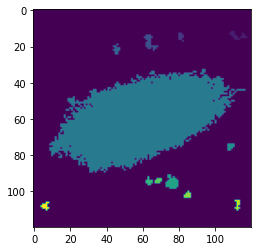

In [22]:
%matplotlib inline
plt.imshow(e.segmentation)

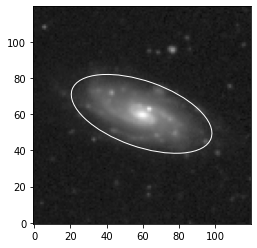

In [24]:
e.draw_guess_ellipse_mpl()

In [27]:
e.fit_ellipse()

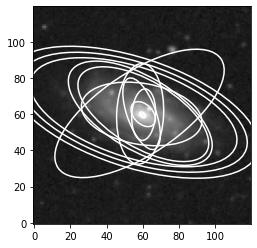

In [28]:
e.draw_fit_results_mpl()

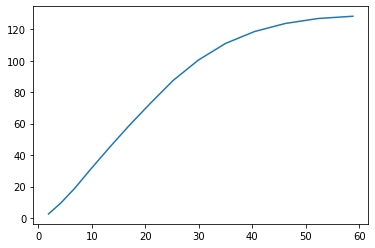

In [19]:
%matplotlib notebook
plt.figure()
plt.plot(ptab['sma_arcsec'],ptab['flux'])


In [18]:
plt.figure()
xline = np.linspace(0,100,100)
plt.plot(xline,xline)
plt.show()

In [29]:
import photutils

In [30]:
photutils.__version__


'1.0.2'

In [1]:
'test'

'test'